# CASE STUDY: Visualize How Urban population Population Grows over years in specific Country

In [27]:
# Disable The Warnings 
import warnings
warnings.filterwarnings('ignore')

In [28]:
# استكشاف
import matplotlib as plt
import pandas as pd

dataset_url = 'https://assets.datacamp.com/production/repositories/464/datasets/2175fef4b3691db03449bbc7ddffb740319c1131/world_ind_pop_data.csv'
df = pd.read_csv(dataset_url)
print(df.head())

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  


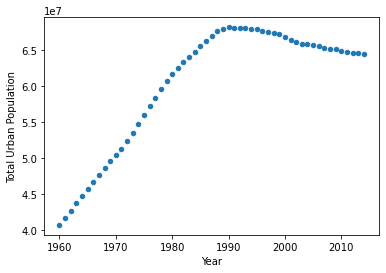

In [29]:
# Reading such Large Data Set as Chuncks using Generator Object Returned from read_csv with chuncksize=??
# Great Deal with Streaming Data: Data constatnly Updated.
def visualize_urban_population(country_code):

    # aggregator/accumulator for peices of work     
    dataframe_aggregator = pd.DataFrame()
    
    dataset_partial_generator = pd.read_csv(dataset_url, chunksize=100)
    for df_urb_pop in dataset_partial_generator:
        # Filter the DataSet so another keeps only row of a Country passed.         
        df_urb_pop_per_country = df_urb_pop[df_urb_pop['CountryCode'] == country_code ]
        
        # keep two columns Total Population and Urban population (% of total') together for each observation.
        pops = zip( df_urb_pop_per_country['Total Population'],
             df_urb_pop_per_country['Urban population (% of total)'])
        pops_list = list(pops)
        
        # Add the new Colums to The Filtered Data Set        
        df_urb_pop_per_country['Total Urban Population'] = [int(pop[0]*pop[1]*0.01)for pop in pops_list]
        
        # build the Big solution          
        dataframe_aggregator = dataframe_aggregator.append(df_urb_pop_per_country)
        
    # plot using plot method          
    dataframe_aggregator.plot(kind='scatter', x='Year', y='Total Urban Population')
#     plt.show()

visualize_urban_population('CEB')